In [1]:
# Common imports
import numpy as np
import os
from backend import import_excel, export_excel

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.style as style
# style.use('bmh')
from mpl_toolkits.mplot3d import Axes3D
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

import pandas as pd
import seaborn as sns

import tensorflow as tf
import keras
import random

import sys
sys.path.append("..")
from sklearn.preprocessing import *
from sklearn.preprocessing import MinMaxScaler
import dataset, network_3D11, WGAN_Model11

# Load data

In [2]:
# Preprocessing
vars = np.zeros((6,864))
j = 0
for i in range(6):
    for i2 in range(4):
        for i3 in range(3):
            for i4 in range(2):
                for i5 in range(3):
                    for i6 in range(2):
                        vars[0,j]=i+2
                        vars[1,j]=i2
                        vars[2,j]=i3
                        vars[3,j]=i4
                        vars[4,j]=i5
                        vars[5,j]=i6
                        j = j +1
j=0
print(vars[:,j])

scenario= "sinus" #sinus, helix
n_instance = 1000
n_features = 2
n_var =int(vars[0,j])
latent_space =3 #3,6,12
batchs = [10,100,1000]
BATCH_SIZE = 100 #100, 32
scales = ['-1-1','0-1']
scaled = '-1-1'
epochs = 1000 #1000, 500
bias = [True,False]
use_bias = True

[2. 0. 0. 0. 0. 0.]


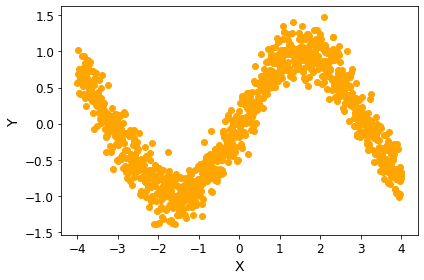

In [3]:
if scenario in ("3d", "helix"):
    X_train, y_train, X_test, y_test, X_valid, y_valid = dataset.get_dataset(n_instance, scenario)
    print("X_train= x,y",X_train.shape)
    print("y_train= z",y_train.shape)

    ax = plt.subplot(projection='3d')
    plt.xlim([-1.5,1.5])
    plt.ylim([-1.5,1.5])
    ax.scatter(X_train[:,0], X_train[:,1], y_train, c='orange')
    ax.set_zlabel('Z')
    ax.set_ylabel('Y')
    ax.set_xlabel('X')
    plt.tight_layout()

    
else:
    X_train, y_train, X_test, y_test, X_valid, y_valid = dataset.get_dataset(n_instance, scenario)
    plt.scatter(X_train,y_train, c='orange', label='Sample Data')
    plt.ylabel('Y')
    plt.xlabel('X')
    plt.tight_layout()

In [4]:
os.system('mkdir Dataset')
os.system('mkdir GANS')
os.system('mkdir GANS/Models')
os.system('mkdir GANS/Losses')
os.system('mkdir GANS/Random_test')
export_excel(X_train, 'Dataset/X_train')
export_excel(y_train, 'Dataset/y_train')

# print(X_train.shape,y_train.shape)
X_train = import_excel('Dataset/X_train')
y_train = import_excel('Dataset/y_train')

print('made dataset')
    
    

made dataset


# WGAN

### Architecture

In [5]:
generator=network_3D11.build_generator(latent_space, n_var, n_features,use_bias)
generator.summary()

discriminator=network_3D11.build_critic(n_var, use_bias, n_features)
discriminator.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 30)                120       
_________________________________________________________________
batch_normalization (BatchNo (None, 30)                120       
_________________________________________________________________
dense_1 (Dense)              (None, 10)                310       
_________________________________________________________________
batch_normalization_1 (Batch (None, 10)                40        
_________________________________________________________________
dense_2 (Dense)              (None, 10)                110       
_________________________________________________________________
batch_normalization_2 (Batch (None, 10)                40        
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 2

In [6]:
wgan = WGAN_Model11.WGAN(n_features,latent_space,BATCH_SIZE,n_var,use_bias)
wgan.wgan.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential_2 (Sequential)    (None, 2)                 762       
_________________________________________________________________
sequential_3 (Sequential)    (None, 1)                 2561      
Total params: 3,323
Trainable params: 3,223
Non-trainable params: 100
_________________________________________________________________


### Preprocessing

In [7]:
train_dataset, scaler, X_train_scaled = wgan.preproc(X_train, y_train, scaled)

print("X_train",X_train.shape)
print("y_train",y_train.shape)
print("X_train_scaled",X_train_scaled.shape)

data shape_1 (100, 2)
data shape_2 (100, 2)
data shape_3 (100, 2)
data shape_4 (100, 2)
data shape_5 (100, 2)
data shape_6 (100, 2)
data shape_7 (100, 2)
data shape_8 (100, 2)
data shape_9 (100, 2)
data shape_10 (100, 2)
Cycles:  10
X_train (1000, 1)
y_train (1000, 1)
X_train_scaled (1000, 2)


In [8]:
for data in train_dataset:
    print('train_dataset',data.shape)


train_dataset (100, 2)
train_dataset (100, 2)
train_dataset (100, 2)
train_dataset (100, 2)
train_dataset (100, 2)
train_dataset (100, 2)
train_dataset (100, 2)
train_dataset (100, 2)
train_dataset (100, 2)
train_dataset (100, 2)


## Training

In [9]:
hist = wgan.train(train_dataset, epochs, scaler, scaled, X_train, y_train)

Epoch 1/1000
critic: 19.568592 - generator: -0.035048 - 3s
Epoch 2/1000
critic: 5.979106 - generator: -0.004125 - 0s
Epoch 3/1000
critic: 1.970584 - generator: -0.002436 - 0s
Epoch 4/1000
critic: 0.349584 - generator: -0.014920 - 0s
Epoch 5/1000
critic: 0.035986 - generator: -0.020396 - 0s
Epoch 6/1000
critic: 0.031584 - generator: -0.024649 - 0s
Epoch 7/1000
critic: 0.024624 - generator: -0.024804 - 0s
Epoch 8/1000
critic: 0.046464 - generator: -0.023023 - 0s
Epoch 9/1000
critic: 0.039057 - generator: -0.020817 - 0s
Epoch 10/1000
critic: 0.020968 - generator: -0.025555 - 0s
Epoch 11/1000
critic: 0.025061 - generator: -0.029875 - 0s
Epoch 12/1000
critic: 0.036135 - generator: -0.034151 - 0s
Epoch 13/1000
critic: 0.021975 - generator: -0.038708 - 0s
Epoch 14/1000
critic: 0.027189 - generator: -0.038866 - 0s
Epoch 15/1000
critic: 0.027697 - generator: -0.042094 - 0s
Epoch 16/1000
critic: 0.020862 - generator: -0.045433 - 0s
Epoch 17/1000
critic: 0.013324 - generator: -0.046508 - 0s
Epoch

critic: 0.018046 - generator: -0.081015 - 0s
Epoch 141/1000
critic: 0.024128 - generator: -0.081020 - 0s
Epoch 142/1000
critic: 0.022378 - generator: -0.082238 - 0s
Epoch 143/1000
critic: 0.010140 - generator: -0.084781 - 0s
Epoch 144/1000
critic: 0.023199 - generator: -0.084078 - 0s
Epoch 145/1000
critic: 0.021265 - generator: -0.082762 - 0s
Epoch 146/1000
critic: 0.016162 - generator: -0.081700 - 0s
Epoch 147/1000
critic: 0.017915 - generator: -0.082949 - 0s
Epoch 148/1000
critic: 0.018667 - generator: -0.083965 - 0s
Epoch 149/1000
critic: 0.019182 - generator: -0.086130 - 0s
Epoch 150/1000
critic: 0.022165 - generator: -0.087012 - 0s
Epoch 151/1000
critic: 0.017974 - generator: -0.088342 - 0s
Epoch 152/1000
critic: 0.020396 - generator: -0.088370 - 0s
Epoch 153/1000
critic: 0.022259 - generator: -0.088765 - 0s
Epoch 154/1000
critic: 0.025827 - generator: -0.089086 - 0s
Epoch 155/1000
critic: 0.017992 - generator: -0.088706 - 0s
Epoch 156/1000
critic: 0.017931 - generator: -0.089379 

critic: 0.013802 - generator: -0.092532 - 0s
Epoch 278/1000
critic: 0.014684 - generator: -0.093330 - 0s
Epoch 279/1000
critic: 0.019729 - generator: -0.091590 - 0s
Epoch 280/1000
critic: 0.027902 - generator: -0.091027 - 0s
Epoch 281/1000
critic: 0.024325 - generator: -0.088460 - 0s
Epoch 282/1000
critic: 0.019914 - generator: -0.090892 - 0s
Epoch 283/1000
critic: 0.016827 - generator: -0.089535 - 0s
Epoch 284/1000
critic: 0.015052 - generator: -0.092028 - 0s
Epoch 285/1000
critic: 0.024915 - generator: -0.090307 - 0s
Epoch 286/1000
critic: 0.012020 - generator: -0.089751 - 0s
Epoch 287/1000
critic: 0.016495 - generator: -0.086927 - 0s
Epoch 288/1000
critic: 0.014884 - generator: -0.090517 - 0s
Epoch 289/1000
critic: 0.018669 - generator: -0.089550 - 0s
Epoch 290/1000
critic: 0.022000 - generator: -0.087981 - 0s
Epoch 291/1000
critic: 0.015515 - generator: -0.087156 - 0s
Epoch 292/1000
critic: 0.017912 - generator: -0.088825 - 0s
Epoch 293/1000
critic: 0.018826 - generator: -0.087741 

critic: 0.023834 - generator: -0.073979 - 0s
Epoch 416/1000
critic: 0.017374 - generator: -0.070850 - 0s
Epoch 417/1000
critic: 0.018674 - generator: -0.070388 - 0s
Epoch 418/1000
critic: 0.027738 - generator: -0.070653 - 0s
Epoch 419/1000
critic: 0.020506 - generator: -0.069607 - 0s
Epoch 420/1000
critic: 0.020905 - generator: -0.071964 - 0s
Epoch 421/1000
critic: 0.021395 - generator: -0.070710 - 0s
Epoch 422/1000
critic: 0.014415 - generator: -0.073415 - 0s
Epoch 423/1000
critic: 0.025292 - generator: -0.073370 - 0s
Epoch 424/1000
critic: 0.016113 - generator: -0.076970 - 0s
Epoch 425/1000
critic: 0.015258 - generator: -0.075468 - 0s
Epoch 426/1000
critic: 0.014482 - generator: -0.071404 - 0s
Epoch 427/1000
critic: 0.016749 - generator: -0.073128 - 0s
Epoch 428/1000
critic: 0.014336 - generator: -0.071732 - 0s
Epoch 429/1000
critic: 0.016284 - generator: -0.076273 - 0s
Epoch 430/1000
critic: 0.020473 - generator: -0.074456 - 0s
Epoch 431/1000
critic: 0.022182 - generator: -0.071354 

critic: 0.018570 - generator: -0.055652 - 0s
Epoch 553/1000
critic: 0.025521 - generator: -0.053695 - 0s
Epoch 554/1000
critic: 0.014907 - generator: -0.054365 - 0s
Epoch 555/1000
critic: 0.014255 - generator: -0.050888 - 0s
Epoch 556/1000
critic: 0.019399 - generator: -0.049801 - 0s
Epoch 557/1000
critic: 0.015960 - generator: -0.048092 - 0s
Epoch 558/1000
critic: 0.016360 - generator: -0.049663 - 0s
Epoch 559/1000
critic: 0.021241 - generator: -0.046291 - 0s
Epoch 560/1000
critic: 0.019129 - generator: -0.051459 - 0s
Epoch 561/1000
critic: 0.015676 - generator: -0.045476 - 0s
Epoch 562/1000
critic: 0.018821 - generator: -0.046623 - 0s
Epoch 563/1000
critic: 0.015712 - generator: -0.045397 - 0s
Epoch 564/1000
critic: 0.009120 - generator: -0.049089 - 0s
Epoch 565/1000
critic: 0.019767 - generator: -0.046454 - 0s
Epoch 566/1000
critic: 0.020042 - generator: -0.052487 - 0s
Epoch 567/1000
critic: 0.019997 - generator: -0.053329 - 0s
Epoch 568/1000
critic: 0.020357 - generator: -0.057117 

critic: 0.014579 - generator: -0.048071 - 0s
Epoch 691/1000
critic: 0.014229 - generator: -0.051716 - 0s
Epoch 692/1000
critic: 0.018873 - generator: -0.053510 - 0s
Epoch 693/1000
critic: 0.012301 - generator: -0.057638 - 0s
Epoch 694/1000
critic: 0.020225 - generator: -0.054752 - 0s
Epoch 695/1000
critic: 0.017280 - generator: -0.054456 - 0s
Epoch 696/1000
critic: 0.013889 - generator: -0.052671 - 0s
Epoch 697/1000
critic: 0.016419 - generator: -0.053967 - 0s
Epoch 698/1000
critic: 0.022759 - generator: -0.053387 - 0s
Epoch 699/1000
critic: 0.015031 - generator: -0.051259 - 0s
Epoch 700/1000
critic: 0.011934 - generator: -0.053244 - 0s
Epoch 701/1000
critic: 0.014040 - generator: -0.054762 - 0s
Epoch 702/1000
critic: 0.017758 - generator: -0.052099 - 0s
Epoch 703/1000
critic: 0.017840 - generator: -0.050220 - 0s
Epoch 704/1000
critic: 0.013744 - generator: -0.052127 - 0s
Epoch 705/1000
critic: 0.017564 - generator: -0.047634 - 0s
Epoch 706/1000
critic: 0.016198 - generator: -0.049001 

critic: 0.021966 - generator: -0.027841 - 0s
Epoch 828/1000
critic: 0.018837 - generator: -0.032575 - 0s
Epoch 829/1000
critic: 0.016643 - generator: -0.035586 - 0s
Epoch 830/1000
critic: 0.020911 - generator: -0.036758 - 0s
Epoch 831/1000
critic: 0.015819 - generator: -0.039238 - 0s
Epoch 832/1000
critic: 0.014683 - generator: -0.037932 - 0s
Epoch 833/1000
critic: 0.015616 - generator: -0.033972 - 0s
Epoch 834/1000
critic: 0.020934 - generator: -0.030466 - 0s
Epoch 835/1000
critic: 0.010844 - generator: -0.030851 - 0s
Epoch 836/1000
critic: 0.020234 - generator: -0.031354 - 0s
Epoch 837/1000
critic: 0.016399 - generator: -0.030108 - 0s
Epoch 838/1000
critic: 0.019466 - generator: -0.029896 - 0s
Epoch 839/1000
critic: 0.014976 - generator: -0.034167 - 0s
Epoch 840/1000
critic: 0.014515 - generator: -0.037724 - 0s
Epoch 841/1000
critic: 0.017863 - generator: -0.040263 - 0s
Epoch 842/1000
critic: 0.015419 - generator: -0.039607 - 0s
Epoch 843/1000
critic: 0.015682 - generator: -0.036222 

critic: 0.012238 - generator: -0.011076 - 0s
Epoch 965/1000
critic: 0.015440 - generator: -0.012027 - 0s
Epoch 966/1000
critic: 0.016988 - generator: -0.015644 - 0s
Epoch 967/1000
critic: 0.011957 - generator: -0.020449 - 0s
Epoch 968/1000
critic: 0.017028 - generator: -0.018299 - 0s
Epoch 969/1000
critic: 0.019494 - generator: -0.019281 - 0s
Epoch 970/1000
critic: 0.013409 - generator: -0.013445 - 0s
Epoch 971/1000
critic: 0.019133 - generator: -0.013856 - 0s
Epoch 972/1000
critic: 0.012830 - generator: -0.015107 - 0s
Epoch 973/1000
critic: 0.013132 - generator: -0.021617 - 0s
Epoch 974/1000
critic: 0.011291 - generator: -0.024451 - 0s
Epoch 975/1000
critic: 0.019334 - generator: -0.024667 - 0s
Epoch 976/1000
critic: 0.022650 - generator: -0.020607 - 0s
Epoch 977/1000
critic: 0.016269 - generator: -0.016168 - 0s
Epoch 978/1000
critic: 0.017108 - generator: -0.013641 - 0s
Epoch 979/1000
critic: 0.022552 - generator: -0.013507 - 0s
Epoch 980/1000
critic: 0.016353 - generator: -0.009178 

#### plot loss

Loss: 


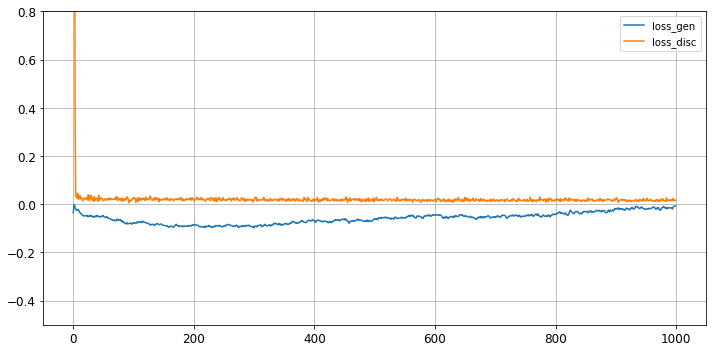

In [10]:
print('Loss: ')
fig, ax = plt.subplots(1,1, figsize=[10,5])
plt.ylim([-0.5,0.8])
ax.plot(hist)
ax.legend(['loss_gen', 'loss_disc'],)

#ax.set_yscale('log')
ax.grid()
plt.tight_layout()
plt.savefig('GANS/Losses/GANS_loss'+str(j)+'.png')

In [11]:
wgan.generator.save('GANS/Models/GAN_'+str(j))
generator = keras.models.load_model('GANS/Models/GAN_'+str(j))
#plt.close()

INFO:tensorflow:Assets written to: GANS/Models/GAN_0/assets


### Sampleing from the latent space

Predicted Values: (1000, 2)


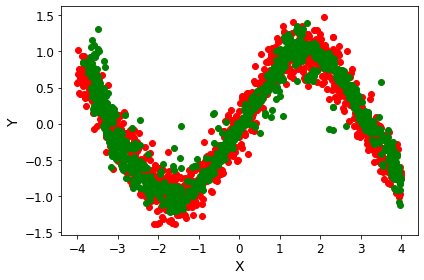

In [12]:
#sampling from the latent space without prediction
latent_values = tf.random.normal([1000, latent_space], mean=0.0, stddev=0.1)

#predict the labels of the data values on the basis of the trained model.
predicted_values = wgan.generator.predict(latent_values)
if scaled == '-1-1':
    predicted_values[:,:]=(predicted_values[:,:])
    predicted_values = scaler.inverse_transform(predicted_values)
elif scaled =='0-1':
    predicted_values = scaler.inverse_transform(predicted_values)
    

if n_features==3:
    print("Predicted Values:",predicted_values.shape)
    print("latent_space:",latent_space)
    print("BATCH_SIZE:",BATCH_SIZE)
    print("use_bias:",use_bias)
    print("epochs:",epochs)
    

    ab = plt.subplot(projection='3d')
    #ab.scatter(X_train[:,0],X_train[:,1],y_train, c='r')
    ab.scatter(predicted_values[:,0],predicted_values[:,1],predicted_values[:,2], c='green')
    ab.set_ylabel('Y')
    ab.set_zlabel('Z')
    ab.set_xlabel('X')
    
    
else:
    print("Predicted Values:",predicted_values.shape)
    plt.scatter(X_train, y_train,c='r')
    plt.scatter(predicted_values[:,0],predicted_values[:,1], c='green')
    plt.ylabel('Y')
    plt.xlabel('X')
    plt.tight_layout()
    

In [13]:
os.system('mkdir result_dataset')

export_excel(predicted_values[:,:], 'result_dataset/predicted_values')
#x=[:0],y=[:1],z=[:2]

print('made result_Dataset')


made result_Dataset


In [14]:
if n_features == 3:    
    
    print("X-Y 2D slices:")
    fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5), sharey=False, sharex=False)
    plt.ylim(-1.5,1.5)
    plt.xlim(-1.5,1.5)
    axes[0].scatter(X_train[:,0],X_train[:,1])
    axes[0].scatter(predicted_values[:,0],predicted_values[:,1],c='green')
    axes[0].set_xlabel("X")
    axes[0].set_ylabel("Y")
    
    plt.ylim(-1.5,1.5)
    plt.xlim(-2,22)
    axes[1].scatter(X_train[:,1],y_train)
    axes[1].scatter(predicted_values[:,1],predicted_values[:,2], c='green')
    axes[1].set_xlabel("Y")
    axes[1].set_ylabel("Z")
    
    plt.xlim(-1.5,1.5)
    plt.ylim(-2,22)
    axes[2].scatter(X_train[:,0],y_train)
    axes[2].scatter(predicted_values[:,0],predicted_values[:,2], c='green')
    axes[2].set_xlabel("X")
    axes[2].set_ylabel("Z")
    
    plt.tight_layout()
    

    fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5), sharey=False, sharex=False)
    
    ac=np.where(np.logical_and(X_train[:,0]>=-0.8-0.05,X_train[:,0]<=-0.8+0.05),X_train[:,1],None)
    ad=np.where(np.logical_and(predicted_values[:,0]>=-0.8-0.05,predicted_values[:,0]<=-0.8+0.05),predicted_values[:,1],None)
    axes[0].scatter(ac,y_train, c='black')
    axes[0].scatter(ad,predicted_values[:,2], c='green')
    axes[0].set_xlabel("Y(X=-0.8)")
    axes[0].set_ylabel("Y")
    
    ae=np.where(np.logical_and(X_train[:,0]>=0.0-0.05,X_train[:,0]<=0.0+0.05),X_train[:,1],None)
    af=np.where(np.logical_and(predicted_values[:,0]>=0.0-0.05,predicted_values[:,0]<=0.0+0.05),predicted_values[:,1],None)
    axes[1].scatter(ae,y_train, c='black')
    axes[1].scatter(af,predicted_values[:,2], c='green')
    axes[1].set_xlabel("Y(X=0.0)")
    axes[1].set_ylabel("Z")
    
    ag=np.where(np.logical_and(X_train[:,0]>=0.8-0.05,X_train[:,0]<=0.8+0.05),X_train[:,1],None)
    ah=np.where(np.logical_and(predicted_values[:,0]>=0.8-0.05,predicted_values[:,0]<=0.8+0.05),predicted_values[:,1],None)
    axes[2].scatter(ag,y_train, c='black')
    axes[2].scatter(ah,predicted_values[:,2], c='green')
    axes[2].set_xlabel("Y(X=0.8)")
    axes[2].set_ylabel("Z")
    
    plt.tight_layout()
    
    
    
    fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5), sharey=False, sharex=False)
    ac=np.where(np.logical_and(X_train[:,1]>=0.2-0.05,X_train[:,1]<=0.2+0.05),X_train[:,0],None)
    ad=np.where(np.logical_and(predicted_values[:,1]>=0.2-0.05,predicted_values[:,1]<=0.2+0.05),predicted_values[:,0],None)
    axes[0].scatter(ac,y_train)
    axes[0].scatter(ad,predicted_values[:,2], c='green')
    axes[0].set_xlabel("X(Y=0.2)")
    axes[0].set_ylabel("Z")
    
    ae=np.where(np.logical_and(X_train[:,1]>=0.5-0.05,X_train[:,1]<=0.5+0.05),X_train[:,0],None)
    af=np.where(np.logical_and(predicted_values[:,1]>=0.5-0.05,predicted_values[:,1]<=0.5+0.05),predicted_values[:,0],None)
    axes[1].scatter(ae,y_train, c='gray')
    axes[1].scatter(af,predicted_values[:,2], c='green')
    axes[1].set_xlabel("X(Y=0.5)")
    axes[1].set_ylabel("Z")
    
    ag=np.where(np.logical_and(X_train[:,1]>=0.8-0.05,X_train[:,1]<=0.8+0.05),X_train[:,0],None)
    ah=np.where(np.logical_and(predicted_values[:,1]>=0.8-0.05,predicted_values[:,1]<=0.8+0.05),predicted_values[:,0],None)
    axes[2].scatter(ag,y_train, c='gray')
    axes[2].scatter(ah,predicted_values[:,2], c='green')
    axes[2].set_xlabel("X(Y=0.8)")
    axes[2].set_ylabel("Z")
    
    
    plt.tight_layout()

### Applying the prediction function

## Fixed Input

input_test : (900, 2)


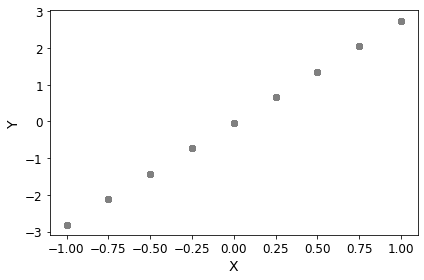

In [15]:
# define these for desired prediction
x_input = [-4,-3,-2,-1,0,1,2,3,4]
n_points = 900
y_min = -1
y_max = 1

# produces an input of fixed x coordinates with random y values
predict1 = np.full((n_points//9, n_features), x_input[0])
predict2 = np.full((n_points//9, n_features), x_input[1])
predict3 = np.full((n_points//9, n_features), x_input[2])
predict4 = np.full((n_points//9, n_features), x_input[3])
predict5 = np.full((n_points//9, n_features), x_input[4])
predict6 = np.full((n_points//9, n_features), x_input[5])
predict7 = np.full((n_points//9, n_features), x_input[6])
predict8 = np.full((n_points//9, n_features), x_input[7])
predict9 = np.full((n_points//9, n_features), x_input[8])

predictthis = np.concatenate((predict1, predict2, predict3, predict4, predict5, predict6, predict7, predict8, predict9))
predictthis = scaler.transform(predictthis)
input_test = predictthis.reshape(n_points, n_features).astype('float32')


print("input_test :",input_test.shape)
plt.scatter(input_test[:,0],input_test[:,1] ,c='grey')
plt.ylabel('Y')
plt.xlabel('X')
plt.tight_layout()
    

In [16]:
X_generated = wgan.predict(input_test, scaler)

input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (

input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (

input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (

input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (

input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (

input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (

input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (

input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (

input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (

input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (

input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (

input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (

input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (

input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (

input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (

input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (

input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (

input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (

input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (

input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (

input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (

input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (

input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (

input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (

input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (

input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (

input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (

input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (

input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (

input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (

input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (

input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (

input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (

input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (

input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (

input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (

input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (

input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (900, 2)
input: (

Generated Data: (899, 2)


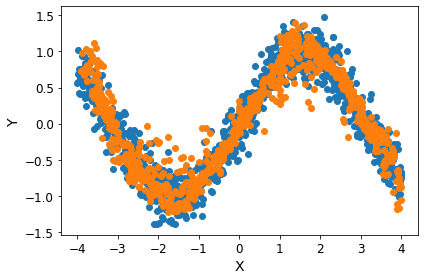

In [17]:
if scenario in ("3d", "helix"):
    print("latent_space=",latent_space)
    print("Epochs=",epochs)
    print("BATCH_SIZE=",BATCH_SIZE)
    print("use_bias=",use_bias)
    
    ax = plt.subplot(projection='3d')
    ax.scatter(X_generated[:,0], X_generated[:,1], X_generated[:,2], label='Generated Data')
    #ax.scatter(X_train[:,0], X_train[:,1], y_train, c='r', label='Sample Data')

    ax.set_zlabel('Z')
    ax.set_ylabel('Y')
    ax.set_xlabel('X')

    plt.legend(loc='best')
    plt.tight_layout()
    
    print("X-Y 2D slices:")
    fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5), sharey=False, sharex=False)
    plt.ylim(-1.5,1.5)
    plt.xlim(-1.5,1.5)
    axes[0].scatter(X_train[:,0],X_train[:,1])
    axes[0].scatter(X_generated[:,0],X_generated[:,1])
    axes[0].set_xlabel("X")
    axes[0].set_ylabel("Y")
    
    plt.ylim(-1.5,1.5)
    plt.xlim(-2,22)
    axes[1].scatter(X_train[:,1],y_train)
    axes[1].scatter(X_generated[:,1],X_generated[:,2])
    axes[1].set_xlabel("Y")
    axes[1].set_ylabel("Z")
    
    plt.xlim(-1.5,1.5)
    plt.ylim(-2,22)
    axes[2].scatter(X_train[:,0],y_train)
    axes[2].scatter(X_generated[:,0],X_generated[:,2])
    axes[2].set_xlabel("X")
    axes[2].set_ylabel("Z")
    
    plt.tight_layout()
    

    fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5), sharey=False, sharex=False)
    
    ac=np.where(np.logical_and(X_train[:,0]>=-0.8-0.05,X_train[:,0]<=-0.8+0.05),X_train[:,1],None)
    ad=np.where(np.logical_and(X_generated[:,0]>=-0.8-0.05,X_generated[:,0]<=-0.8+0.05),X_generated[:,1],None)
    axes[0].scatter(ac,y_train)
    axes[0].scatter(ad,X_generated[:,2])
    axes[0].set_xlabel("Y(X=-0.8)")
    axes[0].set_ylabel("Y")
    
    ae=np.where(np.logical_and(X_train[:,0]>=0.0-0.05,X_train[:,0]<=0.0+0.05),X_train[:,1],None)
    af=np.where(np.logical_and(X_generated[:,0]>=0.0-0.05,X_generated[:,0]<=0.0+0.05),X_generated[:,1],None)
    axes[1].scatter(ae,y_train)
    axes[1].scatter(af,X_generated[:,2])
    axes[1].set_xlabel("Y(X=0.0)")
    axes[1].set_ylabel("Z")
    
    ag=np.where(np.logical_and(X_train[:,0]>=0.8-0.05,X_train[:,0]<=0.8+0.05),X_train[:,1],None)
    ah=np.where(np.logical_and(X_generated[:,0]>=0.8-0.05,X_generated[:,0]<=0.8+0.05),X_generated[:,1],None)
    axes[2].scatter(ag,y_train)
    axes[2].scatter(ah,X_generated[:,2])
    axes[2].set_xlabel("Y(X=0.8)")
    axes[2].set_ylabel("Z")
    
    plt.tight_layout()
    
    
    
    fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5), sharey=False, sharex=False)
    ac=np.where(np.logical_and(X_train[:,1]>=0.2-0.05,X_train[:,1]<=0.2+0.05),X_train[:,0],None)
    ad=np.where(np.logical_and(X_generated[:,1]>=0.2-0.05,X_generated[:,1]<=0.2+0.05),X_generated[:,0],None)
    axes[0].scatter(ac,y_train)
    axes[0].scatter(ad,X_generated[:,2])
    axes[0].set_xlabel("X(Y=0.2)")
    axes[0].set_ylabel("Z")
    
    ae=np.where(np.logical_and(X_train[:,1]>=0.5-0.05,X_train[:,1]<=0.5+0.05),X_train[:,0],None)
    af=np.where(np.logical_and(X_generated[:,1]>=0.5-0.05,X_generated[:,1]<=0.5+0.05),X_generated[:,0],None)
    axes[1].scatter(ae,y_train)
    axes[1].scatter(af,X_generated[:,2])
    axes[1].set_xlabel("X(Y=0.5)")
    axes[1].set_ylabel("Z")
    
    ag=np.where(np.logical_and(X_train[:,1]>=0.8-0.05,X_train[:,1]<=0.8+0.05),X_train[:,0],None)
    ah=np.where(np.logical_and(X_generated[:,1]>=0.8-0.05,X_generated[:,1]<=0.8+0.05),X_generated[:,0],None)
    axes[2].scatter(ag,y_train)
    axes[2].scatter(ah,X_generated[:,2])
    axes[2].set_xlabel("X(Y=0.8)")
    axes[2].set_ylabel("Z")
    
    
    plt.tight_layout()
    
    
else:
    print("Generated Data:",X_generated.shape)
    plt.scatter(X_train, y_train,label="Sample Data")
    plt.scatter(X_generated[:,0],X_generated[:,1])
    plt.ylabel('Y')
    plt.xlabel('X')
    plt.tight_layout()